In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Plotting caracteristics

font = {
    "family": "serif",
    "color": "darkblue",
    "weight": "normal",
    "size": 16,
}
figure_size = (15, 10)

# 1. Données PIB


## 1.A. PIB total en USD courant


In [3]:
pib_total = pd.read_csv("data/pib/pib/pib.csv", header=2)  # From 1960 to 2022
pib_total.drop(
    columns=["Indicator Name", "Indicator Code", "Unnamed: 67"], inplace=True
)
for column in range(1960, 2023):
    pib_total[str(column)] = pib_total.apply(
        lambda row: row[str(column)] / (10**9), axis=1
    )
pib_total.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850,2.790850,2.962907,2.983635,3.092429,3.276184,3.395799,2.558906,3.103184,3.544708
1,NaN,AFE,18.478095,19.366314,20.506467,22.242734,24.294330,26.619561,28.732793,31.592963,...,986.342933,1006.992481,932.513472,890.051427,1028.394291,1012.521425,1006.191000,928.880235,1086.530705,1185.137704
2,Afghanistan,AFG,0.537778,0.548889,0.546667,0.751111,0.800000,1.006667,1.400000,1.673333,...,20.146417,20.497129,19.134222,18.116572,18.753457,18.053223,18.799444,19.955929,14.266499,NaN
3,NaN,AFW,10.411646,11.135925,11.951712,12.685806,13.848999,14.874756,15.845575,14.428493,...,834.097010,894.505003,769.263195,692.114932,685.630290,768.158195,823.405580,786.962437,844.927536,875.393694
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,132.339109,135.966802,90.496421,52.761617,73.690155,79.450688,70.897963,48.501561,66.505130,106.782771


In [4]:
condition = pib_total["Country Code"] == "FRA"
pib_total_france = pib_total.loc[condition].copy().reset_index(drop=True)
pib_total_france

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,France,FRA,62.225478,67.461644,75.60753,84.759195,94.007851,101.537248,110.045852,118.972977,...,2811.876903,2855.964489,2439.188643,2472.964345,2595.151045,2790.956879,2728.870247,2647.418692,2959.355819,2779.092237


In [5]:
pib_total_france = (
    pib_total_france.drop(columns=["Country Name", "Country Code"])
    .transpose()
    .reset_index()
    .rename(columns={"index": "Year", 0: "PIB"})
)

# Set 'Year' as index
pib_total_france.set_index("Year", inplace=True)
pib_total_france.index = pib_total_france.index.astype(int)
pib_total_france.head()

,PIB
Year,
1960,62.225478
1961,67.461644
1962,75.607530
1963,84.759195
1964,94.007851


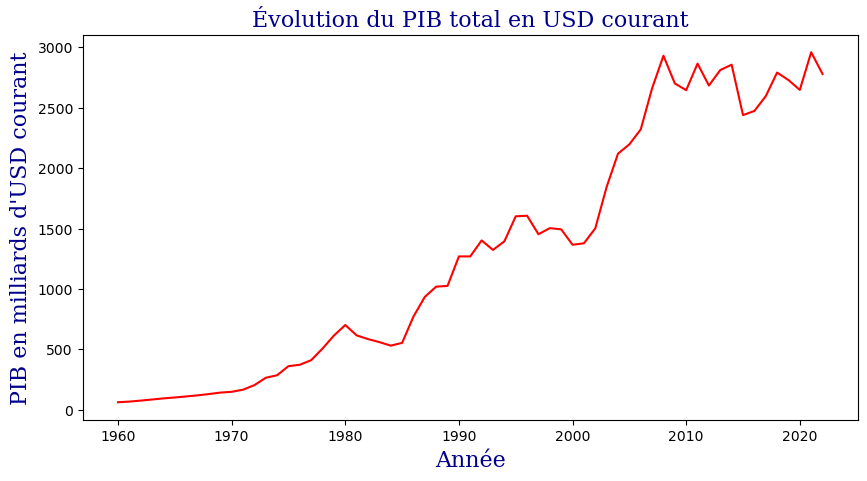

In [6]:
fig, axs = plt.subplots(figsize=(10, 5))

x = pib_total_france.index
y = pib_total_france["PIB"]
axs.plot(x, y, color="red")

axs.set_title("Évolution du PIB total en USD courant", fontdict=font)
axs.set_xlabel("Année", fontdict=font)
axs.set_ylabel("PIB en milliards d'USD courant", fontdict=font)

plt.show()

## 1.B. Croissance du PIB en %


In [7]:
croissance_pib = pd.read_csv(
    "data/pib/croissance_pib/croissance.csv", header=2
)  # From 1960 to 2022
croissance_pib.drop(
    columns=["Indicator Name", "Indicator Code", "Unnamed: 67"], inplace=True
)
croissance_pib.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.431482,-1.586575,-0.623626,1.719624,7.048533,2.381730,-2.302837,-23.982580,27.639357,10.458317
1,NaN,AFE,NaN,0.254876,7.965827,5.148206,4.579317,5.346211,3.935915,5.260547,...,4.216607,4.007577,2.965062,2.219015,2.571941,2.491355,2.040617,-2.799038,4.300441,3.435138
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN
3,NaN,AFW,NaN,1.857727,3.772943,7.277246,5.412950,4.084749,-1.776355,-9.549550,...,6.107013,5.926266,2.813543,0.142092,2.286270,2.838829,3.200919,-0.938162,3.976317,3.766354
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.954613,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403


In [8]:
condition = croissance_pib["Country Code"] == "FRA"
croissance_pib_france = croissance_pib.loc[condition].copy().reset_index(drop=True)
croissance_pib_france

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,France,FRA,NaN,4.980112,6.84347,6.23368,6.6521,4.861508,5.251837,4.921149,...,0.576327,0.956183,1.112912,1.095464,2.29142,1.865066,1.842972,-7.540459,6.43521,2.454758


In [9]:
croissance_pib_france = (
    croissance_pib_france.drop(columns=["Country Name", "Country Code"])
    .transpose()
    .reset_index()
    .rename(columns={"index": "Year", 0: "Croissance"})
)

# Set 'Year' as index
croissance_pib_france.set_index("Year", inplace=True)
croissance_pib_france.index = croissance_pib_france.index.astype(int)
croissance_pib_france.head()

,Croissance
Year,
1960,NaN
1961,4.980112
1962,6.843470
1963,6.233680
1964,6.652100


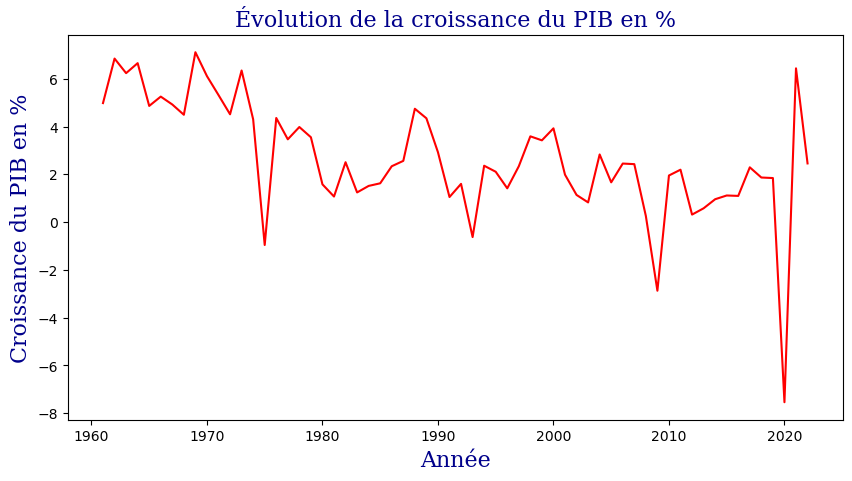

In [10]:
fig, axs = plt.subplots(figsize=(10, 5))

x = croissance_pib_france.index
y = croissance_pib_france["Croissance"]
axs.plot(x, y, color="red")

axs.set_title("Évolution de la croissance du PIB en %", fontdict=font)
axs.set_xlabel("Année", fontdict=font)
axs.set_ylabel("Croissance du PIB en %", fontdict=font)

plt.show()

# 2. Fonctions pour implémenter des limites


In [11]:
def calculate_limit(sub_pib, dict_associated_parameters):
    current_limit_state = 1.0

    def f(x):
        return 1

    return f(current_limit_state) * sub_pib


def general_calculation_limit(
    sub_pib, limit_configuration, dict_associated_parameters=None
):
    match limit_configuration:
        case "limit_config":
            sub_pib_adjusted = calculate_limit(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted

In [12]:
dict_limits_config_base = {"limit_1": {"coef": 1, "config": "config_limit_1"}}


def set_limits(
    pib_total,
    dict_limits_config,
):
    """Outputs all the calculations under certain limit configurations.
    Note that the configuration specifies the function f and its segmentation but does not specify parameters a priori.

    Args:
        pib_total (pd.DataFrame): index 'Year' and column 'PIB'
        dict_limits_config (dict): format {"limit_1": {"coef": 1, "config": "config_limit_1"}}. Sum of coef must equal 1.
        croissance_reelle (_type_, optional): _description_. Defaults to None.
    """
    # nb_limits = len(dict_limits_config)
    pib_total_adjusted = pib_total.copy()

    for limit in dict_limits_config.keys():
        sub_pib = pib_total_adjusted.apply(
            lambda row: row["PIB"] * dict_limits_config[limit]["coef"], axis=1
        ).to_frame(name="sub_pib")

        if "dict_associated_parameters" in dict_limits_config[limit].keys():
            sub_pib_adjusted = general_calculation_limit(
                sub_pib,
                dict_limits_config[limit]["config"],
                dict_associated_parameters=dict_limits_config[limit][
                    "dict_associated_parameters"
                ],
            )
        else:
            sub_pib_adjusted = general_calculation_limit(
                sub_pib, dict_limits_config[limit]["config"]
            )

        pib_total_adjusted["sub_pib_" + limit] = sub_pib
        pib_total_adjusted[limit] = sub_pib_adjusted

    pib_total_adjusted["PIB ajusté"] = pib_total_adjusted[
        dict_limits_config.keys()
    ].sum(axis=1)

    return pib_total_adjusted

In [13]:
def calculate_test_limit_1(sub_pib, dict_associated_parameters):
    current_limit_state = 0.6  # should import limit's data

    def f(x):
        if x < 0.5:
            return 1
        elif x < 0.7:
            return 0.75
        elif x < 0.8:
            return 0.4
        else:
            return 0

    return f(current_limit_state) * sub_pib


def calculate_test_limit_2(sub_pib, dict_associated_parameters):
    current_limit_state = 0.4  # should import limit's data

    def f(x):
        if x < 0.5:
            return 1
        elif x < 0.7:
            return 0.75
        elif x < 0.8:
            return 0.4
        else:
            return 0

    return f(current_limit_state) * sub_pib


def general_calculation_limit(
    sub_pib, limit_configuration, dict_associated_parameters=None
):
    match limit_configuration:
        case "test_config_1":
            sub_pib_adjusted = calculate_test_limit_1(
                sub_pib, dict_associated_parameters
            )
            return sub_pib_adjusted
        case "test_config_2":
            sub_pib_adjusted = calculate_test_limit_2(
                sub_pib, dict_associated_parameters
            )
            return sub_pib_adjusted

In [14]:
dict_limits_config_test = {
    "limit_1": {"coef": 0.5, "config": "test_config_1"},
    "limit_2": {"coef": 0.5, "config": "test_config_2"},
}

test_pib_with_limits = set_limits(pib_total_france, dict_limits_config_test)
test_pib_with_limits

,PIB,sub_pib_limit_1,limit_1,sub_pib_limit_2,limit_2,PIB ajusté
Year,,,,,,
1960,62.225478,31.112739,23.334554,31.112739,31.112739,54.447293
1961,67.461644,33.730822,25.298117,33.730822,33.730822,59.028939
1962,75.607530,37.803765,28.352824,37.803765,37.803765,66.156589
1963,84.759195,42.379598,31.784698,42.379598,42.379598,74.164296
1964,94.007851,47.003926,35.252944,47.003926,47.003926,82.256870
...,...,...,...,...,...,...
2018,2790.956879,1395.478439,1046.608830,1395.478439,1395.478439,2442.087269
2019,2728.870247,1364.435123,1023.326343,1364.435123,1364.435123,2387.761466
2020,2647.418692,1323.709346,992.782009,1323.709346,1323.709346,2316.491355


In [15]:
def plot_pib_with_all_limits(
    pib_adjusted, dict_limits_config, from_year=None, to_year=None
):
    nb_limits = len(dict_limits_config)
    pib_adjusted_to_plot = pib_adjusted.copy()
    if from_year:
        if to_year:
            pib_adjusted_to_plot = pib_adjusted_to_plot.loc[from_year:to_year].copy()
        else:
            pib_adjusted_to_plot = pib_adjusted_to_plot.loc[from_year:].copy()
    elif to_year:
        pib_adjusted_to_plot = pib_adjusted_to_plot.loc[:to_year].copy()

    count = 0
    for limit in list(dict_limits_config.keys()):
        if count == 0:
            pib_adjusted_to_plot["sub_pib_" + str(count)] = pib_adjusted_to_plot[
                "sub_pib_" + limit
            ]
            pib_adjusted_to_plot["sub_pib_adjusted_" + str(count)] = (
                pib_adjusted_to_plot[limit]
            )
        else:
            pib_adjusted_to_plot["sub_pib_" + str(count)] = (
                pib_adjusted_to_plot["sub_pib_" + limit]
                + pib_adjusted_to_plot["sub_pib_" + str(count - 1)]
            )
            pib_adjusted_to_plot["sub_pib_adjusted_" + str(count)] = (
                pib_adjusted_to_plot[limit]
                + pib_adjusted_to_plot["sub_pib_adjusted_" + str(count - 1)]
            )

        count += 1

    fig, axs = plt.subplots(figsize=(10, 5))
    list_colors = ["red", "blue", "green", "brown", "yellow", "purple", "pink"]
    list_labels = list(dict_limits_config.keys())

    x = pib_adjusted_to_plot.index
    for k in range(nb_limits):
        y_1 = pib_adjusted_to_plot["sub_pib_" + str(k)]
        y_2 = pib_adjusted_to_plot["sub_pib_adjusted_" + str(k)]
        color = list_colors[k]
        label = list_labels[k]
        axs.plot(x, y_1, color=color, linestyle="dashed", label=label)
        axs.plot(x, y_2, color=color, linestyle="dotted")

    y_1 = pib_adjusted_to_plot["PIB"]
    y_2 = pib_adjusted_to_plot["PIB ajusté"]
    color = "black"
    axs.plot(x, y_1, color=color, linestyle="solid", label="PIB")
    axs.plot(x, y_2, color=color, linestyle="dotted", label="PIB ajusté")

    axs.set_title("Évolution du PIB en USD courant", fontdict=font)
    axs.set_xlabel("Année", fontdict=font)
    axs.set_ylabel("PIB en USD courant", fontdict=font)
    plt.legend()

    plt.show()

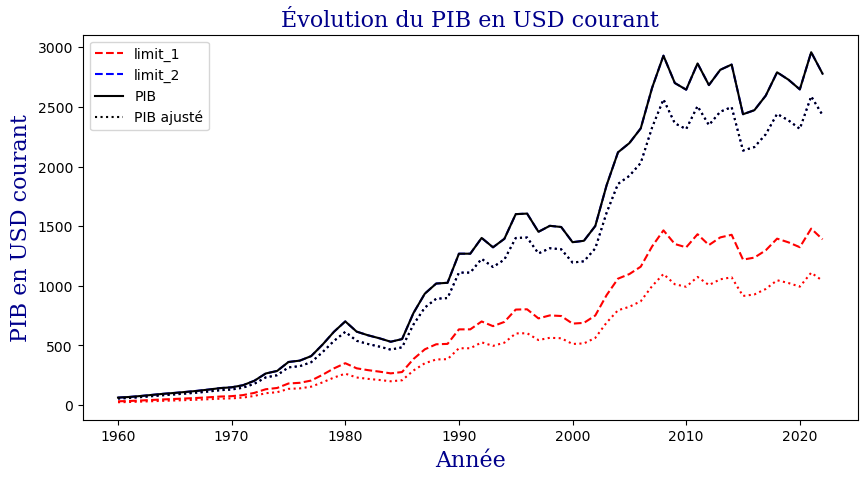

In [16]:
plot_pib_with_all_limits(test_pib_with_limits, dict_limits_config_test)

In [17]:
def plot_pib_with_one_limit(
    pib_adjusted, limit, with_pib=False, from_year=None, to_year=None
):
    pib_adjusted_to_plot = pib_adjusted.copy()
    if from_year:
        if to_year:
            pib_adjusted_to_plot = pib_adjusted_to_plot.loc[from_year:to_year].copy()
        else:
            pib_adjusted_to_plot = pib_adjusted_to_plot.loc[from_year:].copy()
    elif to_year:
        pib_adjusted_to_plot = pib_adjusted_to_plot.loc[:to_year].copy()

    fig, axs = plt.subplots(figsize=(10, 5))

    x = pib_adjusted_to_plot.index

    y_sub_pib = pib_adjusted_to_plot["sub_pib_" + limit]
    y_sub_pib_adjusted = pib_adjusted_to_plot[limit]
    color = "red"
    axs.plot(
        x,
        y_sub_pib,
        color=color,
        linestyle="solid",
        label="Sous-PIB de la limite " + limit,
    )
    axs.plot(
        x,
        y_sub_pib_adjusted,
        color=color,
        linestyle="dotted",
        label="Sous-PIB ajusté de la limite " + limit,
    )

    if with_pib:
        y_pib = pib_adjusted_to_plot["PIB"]
        y_pib_ajuste = pib_adjusted_to_plot["PIB ajusté"]
        color = "black"
        axs.plot(x, y_pib, color=color, linestyle="solid", label="PIB")
        axs.plot(x, y_pib_ajuste, color=color, linestyle="dotted", label="PIB ajusté")

    axs.set_title("Évolution du PIB en USD courant avec limite " + limit, fontdict=font)
    axs.set_xlabel("Année", fontdict=font)
    axs.set_ylabel("PIB en USD courant", fontdict=font)
    plt.legend()

    plt.show()

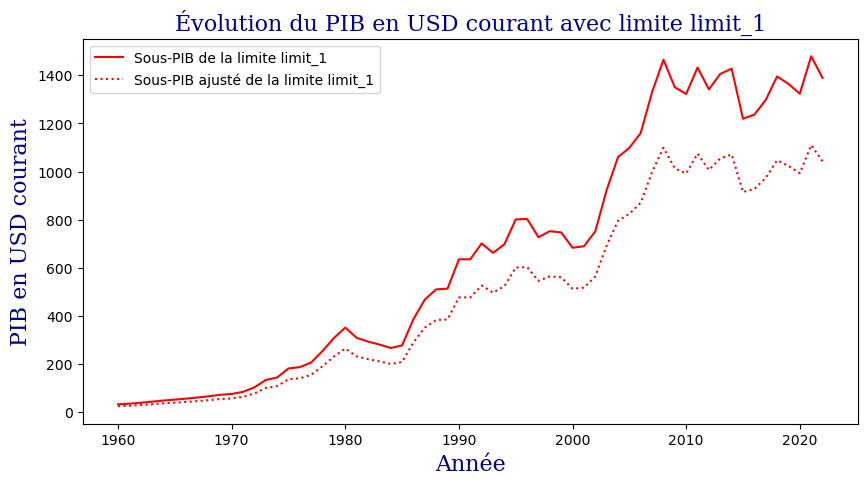

In [18]:
plot_pib_with_one_limit(test_pib_with_limits, "limit_1")

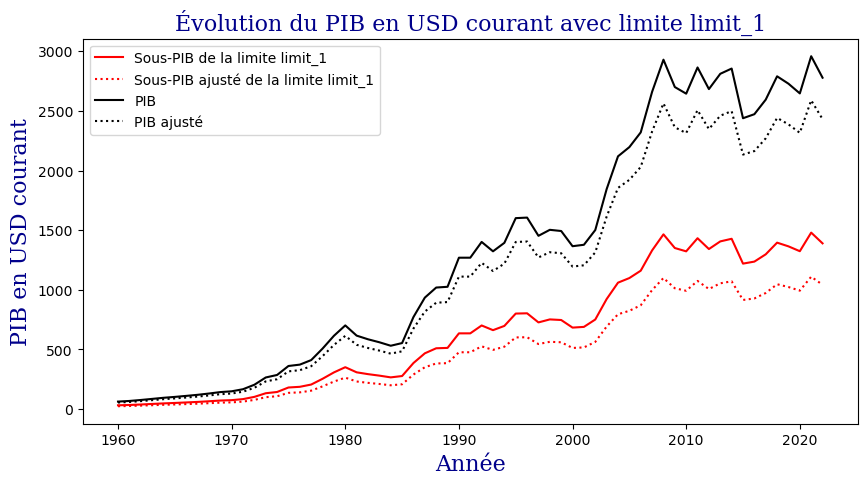

In [19]:
plot_pib_with_one_limit(test_pib_with_limits, "limit_1", with_pib=True)

In [20]:
def linear_interpolation(x, points):
    """
    Performs linear interpolation on a set of points.

    Args:
    - x (float): The x-value to interpolate.
    - points (list of tuples): A list of (x, f) pairs, where the xs are in sorted order.

    Returns:
    - float: The interpolated value, or 1 if x is less than the first x-value,
             or 0 if x is greater than the last x-value.
    """

    # Check if x is less than the first x-value
    if x < points[0][0]:
        return 1

    # Check if x is greater than the last x-value
    if x > points[-1][0]:
        return 0

    # Linear interpolation for values between points
    for i in range(len(points) - 1):
        if points[i][0] <= x <= points[i + 1][0]:
            xA, fA = points[i]
            xB, fB = points[i + 1]
            return fA + (fB - fA) * ((x - xA) / (xB - xA))

    # If x is not in the range, return None (this should not happen if inputs are correct)
    return None

In [21]:
def linear_interpolation_with_penalty(x, points, penalty_coef):
    """
    Performs linear interpolation on a set of points with a penalty coefficient for x-values
    greater than the largest x in points.

    Args:
    - x (float): The x-value to interpolate.
    - points (list of tuples): A list of (x, f) pairs, where the xs are in sorted order.
    - penalty_coef (float): The penalty coefficient to apply for x-values greater than the largest x.

    Returns:
    - float: The interpolated value, or 1 if x is less than the first x-value,
             or the penalized value if x is greater than the last x-value.
    """

    # If x is less than the smallest x in points, return 1
    if x < points[0][0]:
        return 1

    # If x is exactly one of the points, return the corresponding y
    for point in points:
        if x == point[0]:
            return point[1]

    # If x is greater than the largest x in points, apply the penalty
    if x > points[-1][0]:
        x_last, f_last = points[-1]
        # The linear function will have the form y = mx + c
        # We know the slope (m) and a point (x_last, f_last) through which the line passes
        # c can be calculated using the equation of the line y = mx + c
        c = f_last - (penalty_coef * x_last)
        return (penalty_coef * x) + c

    # Otherwise, find the two points (xA, fA) and (xB, fB) such that xA < x < xB
    for i in range(len(points) - 1):
        if points[i][0] < x < points[i + 1][0]:
            xA, fA = points[i]
            xB, fB = points[i + 1]
            # Perform the linear interpolation
            return fA + (fB - fA) * (x - xA) / (xB - xA)

    # If x is not in the range, return None (this should not happen if inputs are correct)
    return None

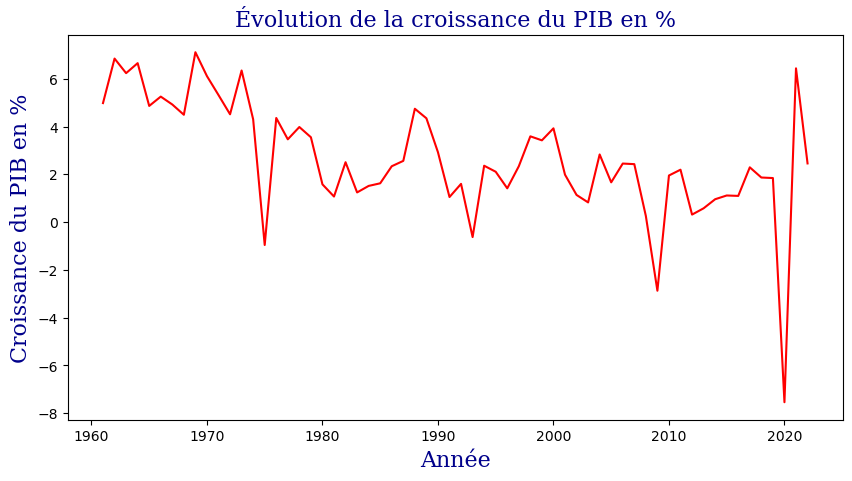

In [22]:
fig, axs = plt.subplots(figsize=(10, 5))

x = croissance_pib_france.index
y = croissance_pib_france["Croissance"]
axs.plot(x, y, color="red")

axs.set_title("Évolution de la croissance du PIB en %", fontdict=font)
axs.set_xlabel("Année", fontdict=font)
axs.set_ylabel("Croissance du PIB en %", fontdict=font)

plt.show()

In [23]:
def plot_linear_interpolation(points, inf, sup, title="Linear Interpolation"):
    """
    Plots the linear interpolation between a series of points.

    Args:
    - points (list of tuples): A list of (x, f) points where the xs are in sorted order.
    - title (str): The title of the plot.
    """
    x_points, y_points = zip(*points)
    # Ensure the range is within the bounds of the data
    x_range = [min(inf, min(x_points)), max(sup, max(x_points))]
    x_values = np.linspace(x_range[0], x_range[1], 500)
    y_values = np.interp(x_values, x_points, y_points)

    # Now plot the points and the piecewise linear interpolation between them
    fig, axs = plt.subplots(figsize=(10, 5))

    axs.plot(x_points, y_points, "o", label="Data points")
    axs.plot(x_values, y_values, "-", label="Linear interpolation")

    axs.set_title(title, fontdict=font)
    axs.set_xlabel("x", fontdict=font)
    axs.set_ylabel("f(x)", fontdict=font)
    axs.legend()
    axs.grid(True)

    plt.show()


def plot_linear_interpolation_with_penalty(
    points, penalty_coef, inf, sup, title="Linear Interpolation with Penalty"
):
    """
    Plots the linear interpolation with penalty coefficient for x-values greater than the largest x in points.

    Args:
    - points (list of tuples): A list of (x, f) points where the xs are in sorted order.
    - penalty_coef (float): The penalty coefficient to apply for x-values greater than the largest x.
    - title (str): The title of the plot.
    """
    x_points, y_points = zip(*points)
    x_range = [min(inf, min(x_points)), min(sup, x_points[-1])]
    x_values = np.linspace(x_range[0], x_range[1], 500)
    y_values = np.interp(x_values, x_points, y_points)

    # Handle plotting when the sup is beyond the last data point
    if sup > x_points[-1]:
        x_penalty = np.linspace(x_points[-1], sup, 100)
        y_intercept = y_points[-1] - penalty_coef * x_points[-1]
        y_penalty = penalty_coef * x_penalty + y_intercept
        x_values = np.concatenate((x_values, x_penalty))
        y_values = np.concatenate((y_values, y_penalty))

    # Plot the points and the piecewise linear interpolation
    fig, axs = plt.subplots(figsize=(10, 5))

    axs.plot(x_points, y_points, "o", label="Data points")
    axs.plot(x_values, y_values, "-", label="Interpolation with penalty")
    axs.set_xlim(inf, sup)

    axs.set_title(title, fontdict=font)
    axs.set_xlabel("x", fontdict=font)
    axs.set_ylabel("f(x)", fontdict=font)
    axs.legend()
    axs.grid(True)

    plt.show()

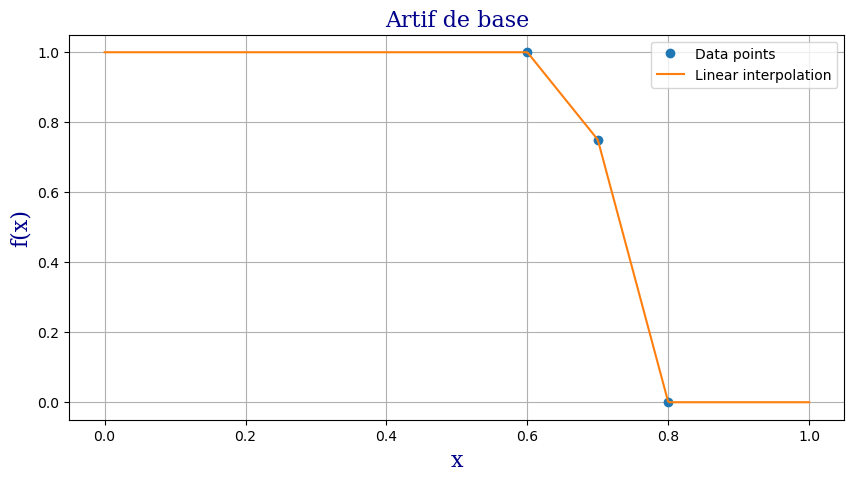

In [24]:
points = [(0.6, 1), (0.7, 0.75), (0.8, 0)]
plot_linear_interpolation(points=points, inf=0, sup=1, title="Artif de base")

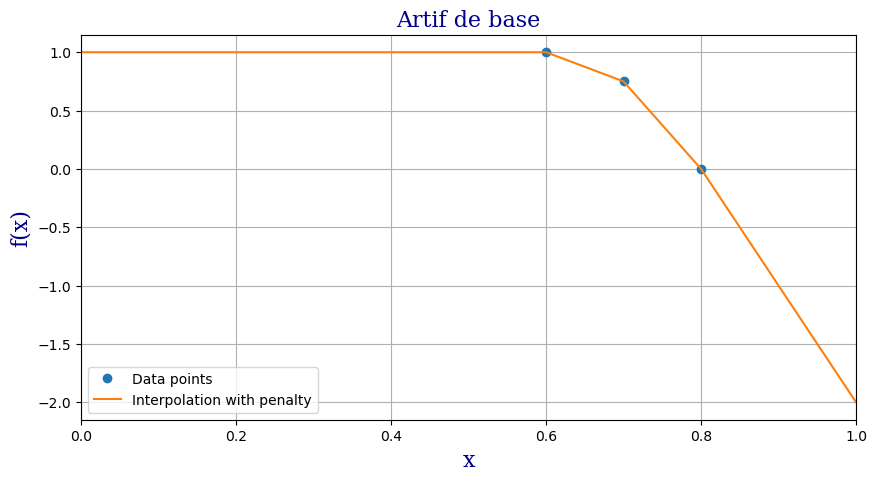

In [25]:
points = [(0.6, 1), (0.7, 0.75), (0.8, 0)]
penalty_coef = -10
plot_linear_interpolation_with_penalty(
    points=points, inf=0, sup=1, penalty_coef=penalty_coef, title="Artif de base"
)

# 3. Limites


# 3.1. Artificialisation des sols


## 3.1.A. Avec l'observatoire de l'artificialisation des sols


In [26]:
def create_data_obs_artif():
    data_path = "data/artificialisation/artif_1982_2020.csv"
    df = pd.read_csv(data_path, index_col="Year")
    df = df.reindex(range(1982, 2021))
    df = df.interpolate(method="linear")
    df = df / 100  # Get percentages

    return df

In [27]:
def f_obs_artif(sol_artif, sol_agri, agg=False, dict_parameters=None):
    if (sol_artif is None) or (sol_agri is None):
        return None

    if not agg:
        list_points_artif = [(0.05, 1), (0.10, 0.9), (0.15, 0.7), (0.2, 0)]
        list_points_agri = [(0.50, 1), (0.55, 0.7), (0.60, 0)]

        if dict_parameters:
            if "points_artif" in dict_parameters.keys():
                list_points_artif = dict_parameters["points_artif"]
            if "points_agri" in dict_parameters.keys():
                list_points_agri = dict_parameters["points_agri"]

        f_artif = linear_interpolation(sol_artif, list_points_artif)
        f_agri = linear_interpolation(sol_agri, list_points_agri)

        return (f_artif + f_agri) / 2
    else:
        list_points_agg = [(0.4, 1), (0.3, 0.7), (0.2, 0)]
        if dict_parameters:
            if "points_agg" in dict_parameters.keys():
                list_points_agg = dict_parameters["points_agg"]
        f_agg = linear_interpolation(sol_artif + sol_agri, list_points_agg)

        return f_agg

In [28]:
def calculate_obs_artif(sub_pib, dict_associated_parameters):
    df_obs_artif = create_data_obs_artif()

    df = pd.concat([df_obs_artif, sub_pib], axis=1)

    def adjustment(row, dict_associated_parameters):
        if (
            pd.isna(row["Sols artificialisés"])
            or pd.isna(row["Terres agricoles"])
            or pd.isna(row["sub_pib"])
        ):
            return None
        else:
            return (
                f_obs_artif(
                    row["Sols artificialisés"],
                    row["Terres agricoles"],
                    dict_parameters=dict_associated_parameters,
                )
                * row["sub_pib"]
            )

    df["sub_pib_adjusted"] = df.apply(
        lambda row: adjustment(
            row, dict_associated_parameters=dict_associated_parameters
        ),
        axis=1,
    )

    return df["sub_pib_adjusted"]

In [29]:
def general_calculation_limit(
    sub_pib, limit_configuration, dict_associated_parameters=None
):
    match limit_configuration:
        case "obs_artif":
            sub_pib_adjusted = calculate_obs_artif(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted

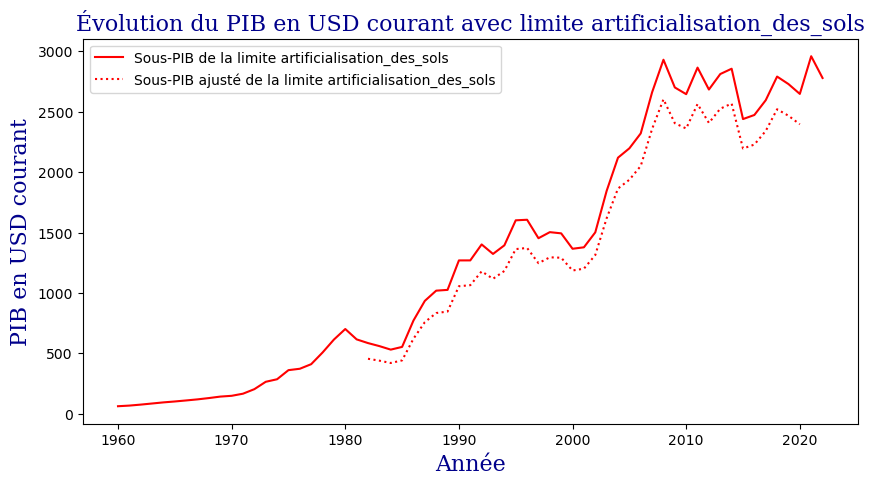

In [30]:
dict_politique_courante = {
    "points_artif": [(0.05, 1), (0.10, 0.9), (0.15, 0.7), (0.2, 0)],
    "points_agri": [(0.50, 1), (0.55, 0.7), (0.60, 0)],
}

dict_limits_config_obs_artif = {
    "artificialisation_des_sols": {
        "coef": 1,
        "config": "obs_artif",
        "dict_associated_parameters": dict_politique_courante,
    }
}

pib_obs_artif = set_limits(pib_total_france, dict_limits_config_obs_artif)
plot_pib_with_one_limit(pib_obs_artif, "artificialisation_des_sols")

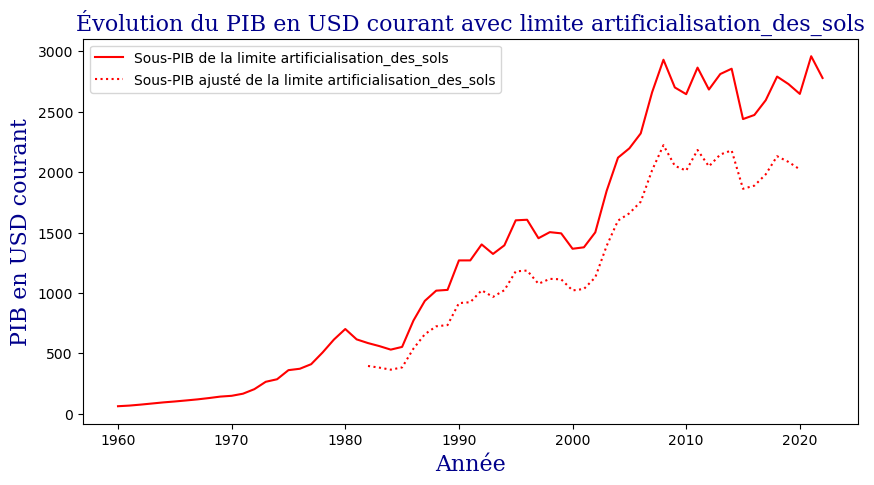

In [31]:
dict_politique_peu_urbaine = {
    "points_artif": [(0.03, 1), (0.05, 0.8), (0.10, 0.6), (0.15, 0)],
    "points_agri": [(0.50, 1), (0.55, 0.7), (0.60, 0)],
}

dict_limits_config_obs_artif = {
    "artificialisation_des_sols": {
        "coef": 1,
        "config": "obs_artif",
        "dict_associated_parameters": dict_politique_peu_urbaine,
    }
}

pib_obs_artif = set_limits(pib_total_france, dict_limits_config_obs_artif)
plot_pib_with_one_limit(pib_obs_artif, "artificialisation_des_sols")

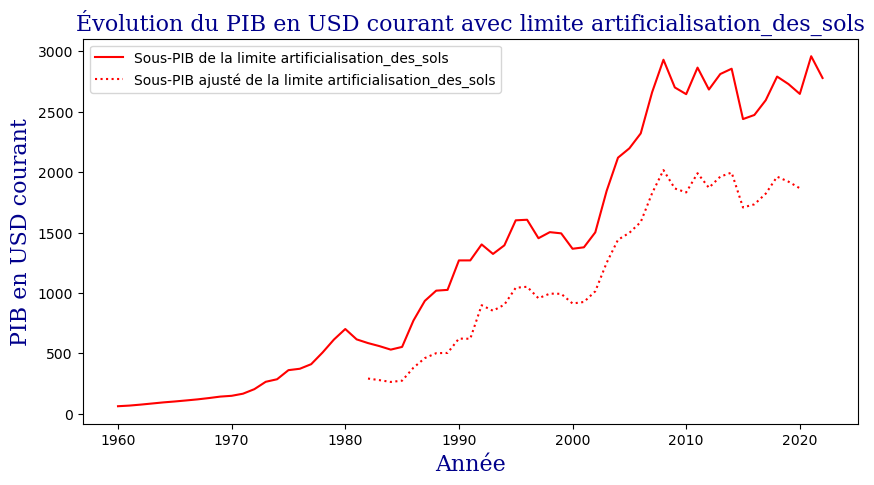

In [32]:
dict_politique_peu_agricole = {
    "points_artif": [(0.05, 1), (0.10, 0.9), (0.15, 0.7), (0.2, 0)],
    "points_agri": [(0.40, 1), (0.45, 0.8), (0.50, 0.6), (0.55, 0.3)],
}

dict_limits_config_obs_artif = {
    "artificialisation_des_sols": {
        "coef": 1,
        "config": "obs_artif",
        "dict_associated_parameters": dict_politique_peu_agricole,
    }
}

pib_obs_artif = set_limits(pib_total_france, dict_limits_config_obs_artif)
plot_pib_with_one_limit(pib_obs_artif, "artificialisation_des_sols")

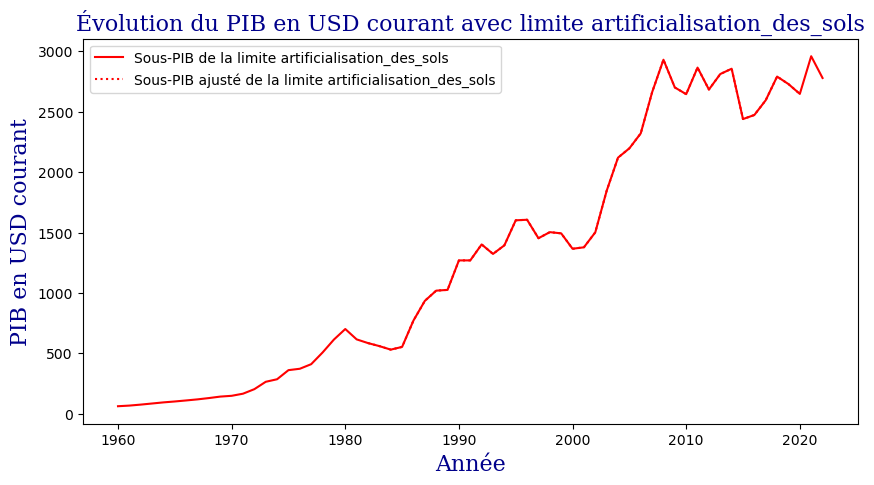

In [33]:
dict_politique_zan = {
    "points_artif": [(0.10, 1), (0.15, 0.60), (0.20, 0)],
    "points_agri": [(1, 1)],
}

dict_limits_config_obs_artif = {
    "artificialisation_des_sols": {
        "coef": 1,
        "config": "obs_artif",
        "dict_associated_parameters": dict_politique_zan,
    }
}

pib_obs_artif = set_limits(pib_total_france, dict_limits_config_obs_artif)
plot_pib_with_one_limit(pib_obs_artif, "artificialisation_des_sols")

## 3.1.B. Avec Eurostat


In [34]:
df = pd.read_csv(
    "/Users/francoismoreau/Documents/Polytechnique/4A/Personal Project/Artificialisation des sols/lan_lcv_ovw__custom_10613899_tabular_yes.tsv",
    delimiter="\t",
)

# Step 2: If the first column contains commas and needs to be split into separate columns,
# you can do so as follows:
split_columns = df.columns[0].split(
    ","
)  # This assumes that the first row is the header
df[split_columns] = df[df.columns[0]].str.split(",", expand=True)

# Now, drop the combined column as it has been split
df = df.drop(columns=[df.columns[0]])
df

,2009,2012,2015,2018,freq,unit,landcover,geo\TIME_PERIOD
0,5.4,4.7,4.6,4.9,A,CVA,LCA,AT
1,10.3,8.7,8,6.6,A,CVA,LCA,AT1
2,25.3,20.7,18.4,14.4,A,CVA,LCA,AT11
3,12.8,10.9,10,8.3,A,CVA,LCA,AT12
4,20.3,16.1,15.4,14.1,A,CVA,LCA,AT13
...,...,...,...,...,...,...,...,...
10458,:,:,:,0.8,A,PC,LCH,UKM7
10459,:,:,:,0.7 u,A,PC,LCH,UKM8
10460,:,:,:,0.4 u,A,PC,LCH,UKM9
10461,6.2,3.8,4.9,2.2 u,A,PC,LCH,UKN


In [35]:
condition = df["geo\\TIME_PERIOD"] == "FR"
df[condition]

,2009,2012,2015,2018,freq,unit,landcover,geo\TIME_PERIOD
168,1.7,1.6,1.6,2.5,A,CVA,LCA,FR
613,0.6,0.6,0.6,1,A,CVA,LCB,FR
1056,0.6,0.5,0.5,1,A,CVA,LCC,FR
1501,2.4,2.2,2.3,4.9,A,CVA,LCD,FR
1945,0.7,0.6,0.7,1.3,A,CVA,LCE,FR
2388,2.7,2.4,2.2,10.8,A,CVA,LCF,FR
2826,3.1,3,3.1,7.5,A,CVA,LCG,FR
3245,11.7,8.4,7.7,9.6,A,CVA,LCH,FR
3654,27847,28574,29415,30893,A,KM2,LCA,FR
4099,158849,159965,158655,164349,A,KM2,LCB,FR


In [36]:
# TODO

# 3.2. Émissions gaz à effet de serre


## 3.2.A. World Bank GES Emissions


In [37]:
def create_specific_ges_data_wb(ges, country_code="FRA"):
    ges_total = pd.read_csv(
        f"data/emissions_ges/{ges}.csv", header=2
    )  # From 1960 to 2023
    ges_total.drop(
        columns=["Indicator Name", "Indicator Code", "Unnamed: 68"], inplace=True
    )

    condition = ges_total["Country Code"] == country_code
    ges_total_france = ges_total.loc[condition].copy().reset_index(drop=True)

    ges_total_france = (
        ges_total_france.drop(columns=["Country Name", "Country Code"])
        .transpose()
        .reset_index()
        .rename(columns={"index": "Year", 0: ges})
    )

    # # Set 'Year' as index
    ges_total_france.set_index("Year", inplace=True)
    ges_total_france.index = ges_total_france.index.astype(int)
    return ges_total_france


def create_ges_data_wb(country_code="FRA"):
    list_ges = ["co2", "ch4", "hfc", "n2o", "pfc", "sf6"]
    data = pd.concat(
        [
            create_specific_ges_data_wb(ges, country_code=country_code)
            for ges in list_ges
        ],
        axis=1,
    )
    data["ges_total"] = data.sum(axis=1)
    data = data / (10**3)
    data["ges_total"] = data["ges_total"].replace(0, np.nan)
    return data

In [38]:
create_ges_data_wb()

,co2,ch4,hfc,n2o,pfc,sf6,ges_total
Year,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019,300.5616,59.456622,NaN,37.375359,NaN,NaN,397.393581
2020,267.1547,58.451487,NaN,36.202715,NaN,NaN,361.808903
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
def f_ges_wb(ges_qtt, dict_parameters=None):
    if ges_qtt is None:
        return None

    objective_ges_qtt = 81
    ecart = ges_qtt - objective_ges_qtt

    list_points_ges = [(0, 1), (1000, 0)]
    if dict_parameters:
        if "points_ges" in dict_parameters.keys():
            list_points_ges = dict_parameters["points_ges"]
    f_ges = linear_interpolation(ecart, list_points_ges)

    return f_ges

In [40]:
def calculate_ges_wb(sub_pib, dict_associated_parameters):
    country_code = "FRA"
    if dict_associated_parameters:
        if "country_code" in dict_associated_parameters.keys():
            country_code = dict_associated_parameters["country_code"]
    df_ges_wb = create_ges_data_wb(country_code=country_code)

    df = pd.concat([df_ges_wb, sub_pib], axis=1)

    def adjustment(row, dict_associated_parameters):
        if pd.isna(row["ges_total"]):
            return None
        else:
            return (
                f_ges_wb(
                    row["ges_total"],
                    dict_parameters=dict_associated_parameters,
                )
                * row["sub_pib"]
            )

    df["sub_pib_adjusted"] = df.apply(
        lambda row: adjustment(
            row, dict_associated_parameters=dict_associated_parameters
        ),
        axis=1,
    )

    return df["sub_pib_adjusted"]

In [41]:
def general_calculation_limit(
    sub_pib, limit_configuration, dict_associated_parameters=None
):
    match limit_configuration:
        case "obs_artif":
            sub_pib_adjusted = calculate_obs_artif(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "ges_wb":
            sub_pib_adjusted = calculate_ges_wb(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted

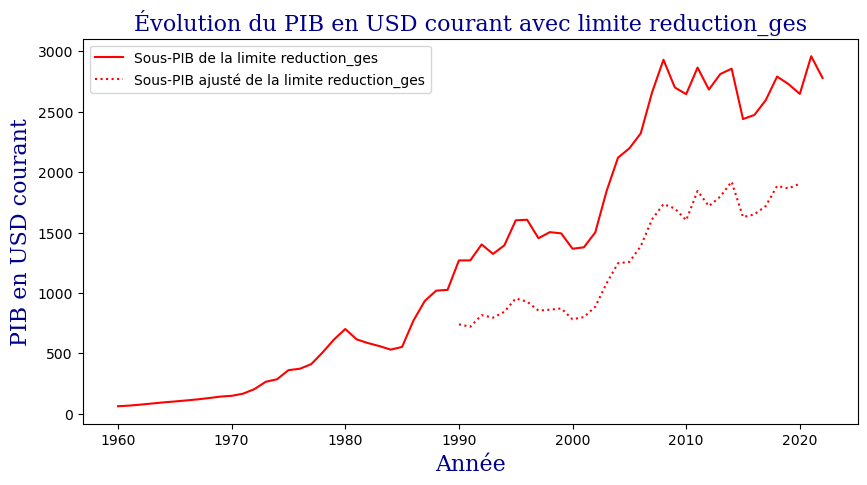

In [42]:
dict_limits_config_ges_wb = {
    "reduction_ges": {
        "coef": 1,
        "config": "ges_wb",
    }
}

pib_ges_wb = set_limits(pib_total_france, dict_limits_config_ges_wb)
plot_pib_with_one_limit(pib_ges_wb, "reduction_ges")

## 3.2.B. Worldbank GES per capita


In [43]:
def create_ges_per_capita_data_wb(country_code="FRA"):
    ges_total = pd.read_csv(
        f"data/emissions_ges/ges_total.csv", header=2
    )  # From 1960 to 2023
    ges_total.drop(
        columns=["Indicator Name", "Indicator Code", "Unnamed: 68"], inplace=True
    )

    condition = ges_total["Country Code"] == country_code
    ges_total_country = ges_total.loc[condition].copy().reset_index(drop=True)

    ges_total_country = (
        ges_total_country.drop(columns=["Country Name", "Country Code"])
        .transpose()
        .reset_index()
        .rename(columns={"index": "Year", 0: "ges_total"})
    )

    # # Set 'Year' as index
    ges_total_country.set_index("Year", inplace=True)
    ges_total_country.index = ges_total_country.index.astype(int)
    ges_total_country = ges_total_country * 1000

    population_total = pd.read_csv(
        f"data/population.csv", header=2
    )  # From 1960 to 2023
    population_total.drop(
        columns=["Indicator Name", "Indicator Code", "Unnamed: 68"], inplace=True
    )

    condition = population_total["Country Code"] == country_code
    population_total_country = (
        population_total.loc[condition].copy().reset_index(drop=True)
    )

    population_total_country = (
        population_total_country.drop(columns=["Country Name", "Country Code"])
        .transpose()
        .reset_index()
        .rename(columns={"index": "Year", 0: "population"})
    )

    # # Set 'Year' as index
    population_total_country.set_index("Year", inplace=True)
    population_total_country.index = population_total_country.index.astype(int)

    data = pd.concat([ges_total_country, population_total_country], axis=1)
    data["ges_per_capita"] = data["ges_total"] / data["population"]

    return data

In [44]:
create_ges_per_capita_data_wb()

,ges_total,population,ges_per_capita
Year,,,
1960,NaN,46649927.0,NaN
1961,NaN,47161641.0,NaN
1962,NaN,47679792.0,NaN
1963,NaN,48189939.0,NaN
1964,NaN,48733997.0,NaN
...,...,...,...
2019,412999043.4,67388001.0,6.128673
2020,376006245.4,67571107.0,5.564601
2021,NaN,67764304.0,NaN


In [45]:
def f_ges_per_capita_wb(ges_per_capita_qtt, dict_parameters=None):
    if ges_per_capita_qtt is None:
        return None

    objective_ges_per_capita_qtt = 2.5
    ecart = ges_per_capita_qtt - objective_ges_per_capita_qtt

    list_points_ges_per_capita = [(0, 1), (50, 0)]
    if dict_parameters:
        if "points_ges_per_capita" in dict_parameters.keys():
            list_points_ges_per_capita = dict_parameters["points_ges_per_capita"]
    f_ges_per_capita = linear_interpolation(ecart, list_points_ges_per_capita)

    return f_ges_per_capita

In [46]:
def calculate_ges_per_capita_wb(sub_pib, dict_associated_parameters):
    country_code = "FRA"
    if dict_associated_parameters:
        if "country_code" in dict_associated_parameters.keys():
            country_code = dict_associated_parameters["country_code"]

    df_ges_per_capita_wb = create_ges_per_capita_data_wb(country_code=country_code)
    df = pd.concat([df_ges_per_capita_wb, sub_pib], axis=1)

    def adjustment(row, dict_associated_parameters):
        if pd.isna(row["ges_per_capita"]):
            return None
        else:
            return (
                f_ges_per_capita_wb(
                    row["ges_per_capita"],
                    dict_parameters=dict_associated_parameters,
                )
                * row["sub_pib"]
            )

    df["sub_pib_adjusted"] = df.apply(
        lambda row: adjustment(
            row, dict_associated_parameters=dict_associated_parameters
        ),
        axis=1,
    )

    return df["sub_pib_adjusted"]

In [47]:
def general_calculation_limit(
    sub_pib, limit_configuration, dict_associated_parameters=None
):
    match limit_configuration:
        case "obs_artif":
            sub_pib_adjusted = calculate_obs_artif(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "ges_wb":
            sub_pib_adjusted = calculate_ges_wb(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "ges_per_capita_wb":
            sub_pib_adjusted = calculate_ges_per_capita_wb(
                sub_pib, dict_associated_parameters
            )
            return sub_pib_adjusted

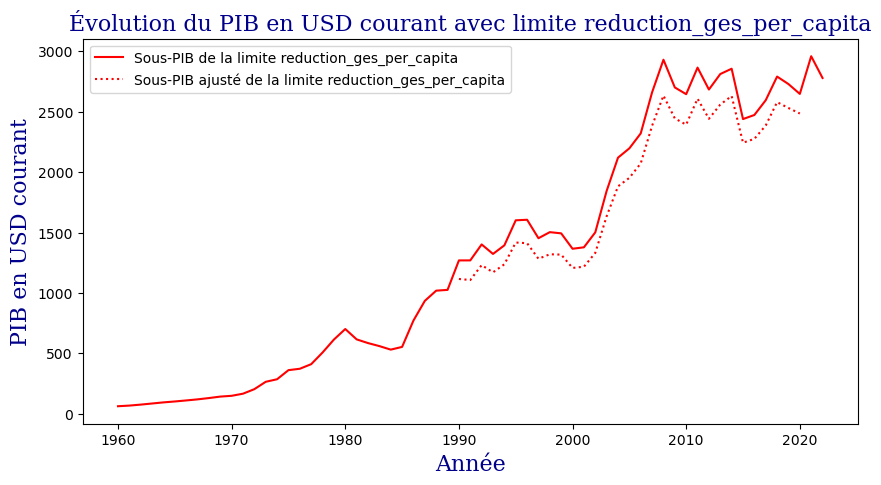

In [48]:
dict_limits_config_ges_per_capita_wb = {
    "reduction_ges_per_capita": {
        "coef": 1,
        "config": "ges_per_capita_wb",
    }
}

pib_ges_per_capita_wb = set_limits(
    pib_total_france, dict_limits_config_ges_per_capita_wb
)
plot_pib_with_one_limit(pib_ges_per_capita_wb, "reduction_ges_per_capita")

# 3.3. Eau


## 3.3.A. Pourcentage d'extraction de ressources d'eau internes WorldBank


In [49]:
def create_eau_data_wb(country_code="FRA"):
    eau_total = pd.read_csv(f"data/eau/eau.csv", header=2)  # From 1960 to 2023
    eau_total.drop(
        columns=["Indicator Name", "Indicator Code", "Unnamed: 68"], inplace=True
    )

    condition = eau_total["Country Code"] == country_code
    eau_total_country = eau_total.loc[condition].copy().reset_index(drop=True)

    eau_total_country = (
        eau_total_country.drop(columns=["Country Name", "Country Code"])
        .transpose()
        .reset_index()
        .rename(columns={"index": "Year", 0: "eau"})
    )
    eau_total_country.set_index("Year", inplace=True)
    eau_total_country.index = eau_total_country.index.astype(int)
    eau_total_country["eau"] = eau_total_country["eau"] / 100

    return eau_total_country

In [125]:
create_eau_data_wb()

Year
1960            NaN
1961            NaN
1962            NaN
1963            NaN
1964            NaN
           ...     
2019    1628.666667
2020    1587.333333
2021            NaN
2022            NaN
2023            NaN
Name: ARE, Length: 64, dtype: float64

In [51]:
def f_eau_wb(eau, dict_parameters=None):
    if eau is None:
        return None

    list_points_eau = [(0.5, 1), (0.7, 0.8), (0.8, 0.7), (0.9, 0.5), (1, 0)]
    if dict_parameters:
        if "points_eau" in dict_parameters.keys():
            list_points_eau = dict_parameters["points_eau"]
    f_eau = linear_interpolation(eau, list_points_eau)

    return f_eau

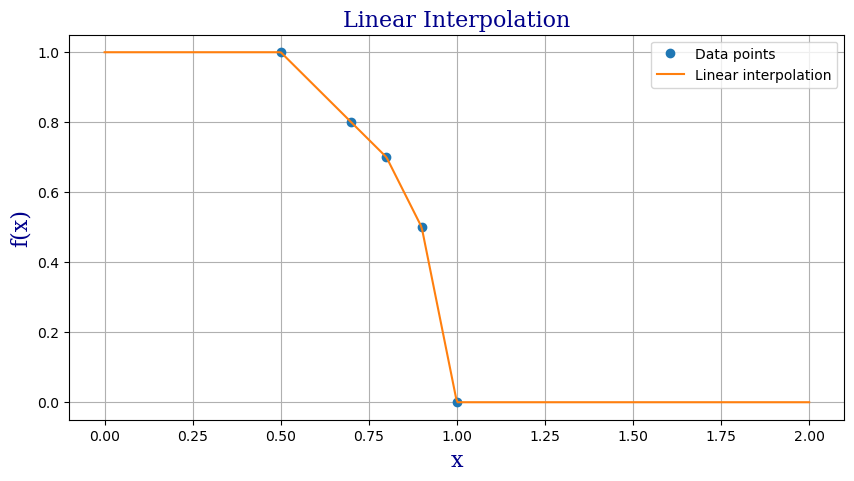

In [52]:
plot_linear_interpolation(
    [(0.5, 1), (0.7, 0.8), (0.8, 0.7), (0.9, 0.5), (1, 0)], inf=0, sup=2
)

In [53]:
def calculate_eau_wb(sub_pib, dict_associated_parameters):
    country_code = "FRA"
    if dict_associated_parameters:
        if "country_code" in dict_associated_parameters.keys():
            country_code = dict_associated_parameters["country_code"]
    df_eau_wb = create_eau_data_wb(country_code=country_code)

    df = pd.concat([df_eau_wb, sub_pib], axis=1)

    def adjustment(row, dict_associated_parameters):
        if pd.isna(row["eau"]):
            return None
        else:
            return (
                f_eau_wb(
                    row["eau"],
                    dict_parameters=dict_associated_parameters,
                )
                * row["sub_pib"]
            )

    df["sub_pib_adjusted"] = df.apply(
        lambda row: adjustment(
            row, dict_associated_parameters=dict_associated_parameters
        ),
        axis=1,
    )

    return df["sub_pib_adjusted"]

In [54]:
def general_calculation_limit(
    sub_pib, limit_configuration, dict_associated_parameters=None
):
    match limit_configuration:
        case "obs_artif":
            sub_pib_adjusted = calculate_obs_artif(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "ges_wb":
            sub_pib_adjusted = calculate_ges_wb(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "ges_per_capita_wb":
            sub_pib_adjusted = calculate_ges_per_capita_wb(
                sub_pib, dict_associated_parameters
            )
            return sub_pib_adjusted
        case "eau_wb":
            sub_pib_adjusted = calculate_eau_wb(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted

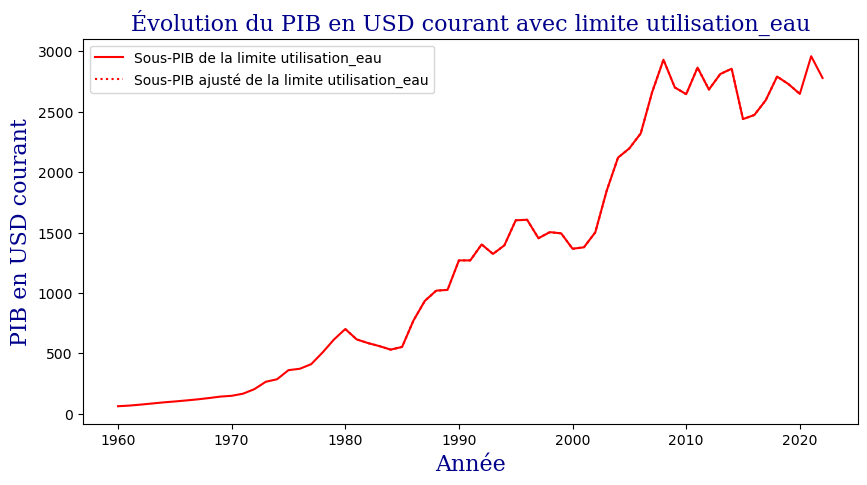

In [55]:
dict_limits_config_eau_wb = {
    "utilisation_eau": {
        "coef": 1,
        "config": "eau_wb",
    }
}

pib_eau_wb = set_limits(pib_total_france, dict_limits_config_eau_wb)
plot_pib_with_one_limit(pib_eau_wb, "utilisation_eau")

# 3.4. Extraction de matières premières


In [56]:
def create_domestic_extraction_per_capita_data_rp(country="France"):
    material_extraction_total = pd.read_csv(
        f"data/material_extraction/mfa_totals_ratios_export.csv"
    )  # From 1970 to 2024
    condition = material_extraction_total["Flow code"] == "DE/cap"
    material_extraction_total = material_extraction_total[condition].copy()
    print()
    material_extraction_total.drop(
        columns=["Flow name", "Flow code", "Flow unit"], inplace=True
    )

    condition = material_extraction_total["Country"] == country
    material_extraction_total_country = (
        material_extraction_total.loc[condition].copy().reset_index(drop=True)
    )

    material_extraction_total_country = (
        material_extraction_total_country.drop(columns=["Country"])
        .transpose()
        .reset_index()
        .rename(columns={"index": "Year", 0: "domestic_extraction_per_capita"})
    )
    material_extraction_total_country.set_index("Year", inplace=True)
    material_extraction_total_country.index = (
        material_extraction_total_country.index.astype(int)
    )
    return material_extraction_total_country

In [74]:
def f_domestic_extraction_per_capita_rp(
    domestic_extraction_per_capita, dict_parameters=None
):
    if domestic_extraction_per_capita is None:
        return None

    objective_domestic_extraction_per_capita = 6  # Limite haute
    ecart = domestic_extraction_per_capita - objective_domestic_extraction_per_capita

    list_points_domestic_extraction = [(0, 1), (8, 0.85), (15, 0.7), (25, 0.4), (35, 0)]
    if dict_parameters:
        if "points_domestic_extraction" in dict_parameters.keys():
            list_points_domestic_extraction = dict_parameters[
                "points_domestic_extraction"
            ]
    f_domestic_extraction = linear_interpolation(
        domestic_extraction_per_capita, list_points_domestic_extraction
    )

    return f_domestic_extraction

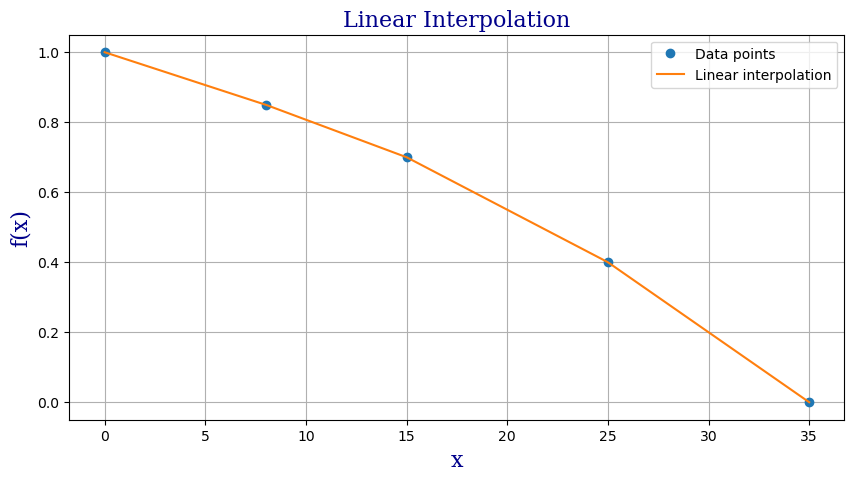

In [75]:
plot_linear_interpolation(
    [(0, 1), (8, 0.85), (15, 0.7), (25, 0.4), (35, 0)], inf=0, sup=20
)

In [76]:
def calculate_domestic_extraction_per_capita_rp(sub_pib, dict_associated_parameters):
    country = "France"
    if dict_associated_parameters:
        if "country" in dict_associated_parameters.keys():
            country = dict_associated_parameters["country"]
    df_domestic_extraction_per_capita_rp = (
        create_domestic_extraction_per_capita_data_rp(country=country)
    )

    df = pd.concat([df_domestic_extraction_per_capita_rp, sub_pib], axis=1)

    def adjustment(row, dict_associated_parameters):
        if pd.isna(row["domestic_extraction_per_capita"]):
            return None
        else:
            return (
                f_domestic_extraction_per_capita_rp(
                    row["domestic_extraction_per_capita"],
                    dict_parameters=dict_associated_parameters,
                )
                * row["sub_pib"]
            )

    df["sub_pib_adjusted"] = df.apply(
        lambda row: adjustment(
            row, dict_associated_parameters=dict_associated_parameters
        ),
        axis=1,
    )

    return df["sub_pib_adjusted"]

In [77]:
def general_calculation_limit(
    sub_pib, limit_configuration, dict_associated_parameters=None
):
    match limit_configuration:
        case "obs_artif":
            sub_pib_adjusted = calculate_obs_artif(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "ges_wb":
            sub_pib_adjusted = calculate_ges_wb(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "ges_per_capita_wb":
            sub_pib_adjusted = calculate_ges_per_capita_wb(
                sub_pib, dict_associated_parameters
            )
            return sub_pib_adjusted
        case "eau_wb":
            sub_pib_adjusted = calculate_eau_wb(sub_pib, dict_associated_parameters)
            return sub_pib_adjusted
        case "domestic_extraction_per_capita_rp":
            sub_pib_adjusted = calculate_domestic_extraction_per_capita_rp(
                sub_pib, dict_associated_parameters
            )
            return sub_pib_adjusted

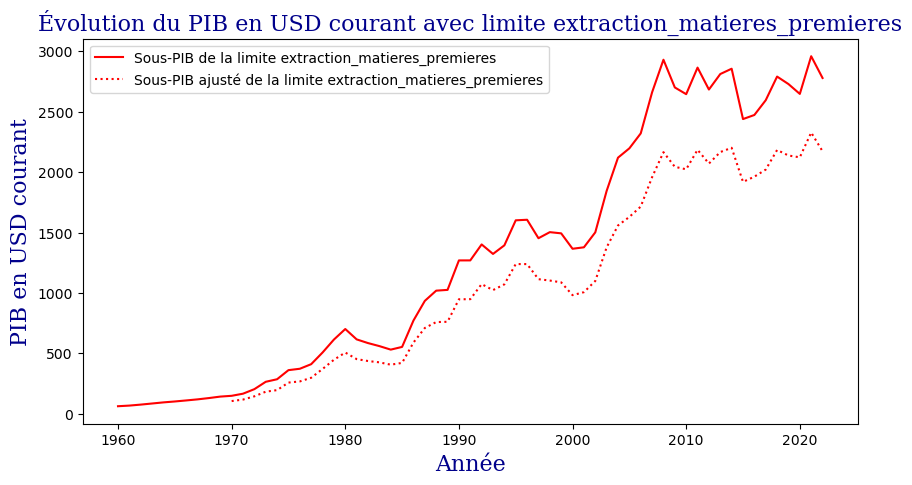

In [78]:
dict_limits_config_domestic_extraction_rp = {
    "extraction_matieres_premieres": {
        "coef": 1,
        "config": "domestic_extraction_per_capita_rp",
    }
}

pib_domestic_extraction_rp = set_limits(
    pib_total_france, dict_limits_config_domestic_extraction_rp
)
plot_pib_with_one_limit(pib_domestic_extraction_rp, "extraction_matieres_premieres")

# 4. Différents scénarios


In [79]:
def create_pib_data(country_code="FRA"):
    pib_total = pd.read_csv("data/pib/pib/pib.csv", header=2)  # From 1960 to 2022
    pib_total.drop(
        columns=["Indicator Name", "Indicator Code", "Unnamed: 67"], inplace=True
    )
    for column in range(1960, 2023):
        pib_total[str(column)] = pib_total.apply(
            lambda row: row[str(column)] / (10**9), axis=1
        )

    condition = pib_total["Country Code"] == country_code
    pib_total_country = pib_total.loc[condition].copy().reset_index(drop=True)

    pib_total_country = (
        pib_total_country.drop(columns=["Country Name", "Country Code"])
        .transpose()
        .reset_index()
        .rename(columns={"index": "Year", 0: "PIB"})
    )

    # Set 'Year' as index
    pib_total_country.set_index("Year", inplace=True)
    pib_total_country.index = pib_total_country.index.astype(int)

    return pib_total_country

In [80]:
def create_croissance_data(country_code="FRA"):
    croissance_total = pd.read_csv(
        "data/pib/pib/croissance.csv", header=2
    )  # From 1960 to 2022
    croissance_total.drop(
        columns=["Indicator Name", "Indicator Code", "Unnamed: 67"], inplace=True
    )

    condition = croissance_total["Country Code"] == country_code
    croissance_total_country = (
        croissance_total.loc[condition].copy().reset_index(drop=True)
    )

    croissance_total_country = (
        croissance_total_country.drop(columns=["Country Name", "Country Code"])
        .transpose()
        .reset_index()
        .rename(columns={"index": "Year", 0: "PIB"})
    )

    # Set 'Year' as index
    croissance_total_country.set_index("Year", inplace=True)
    croissance_total_country.index = croissance_total_country.index.astype(int)

    return croissance_total_country

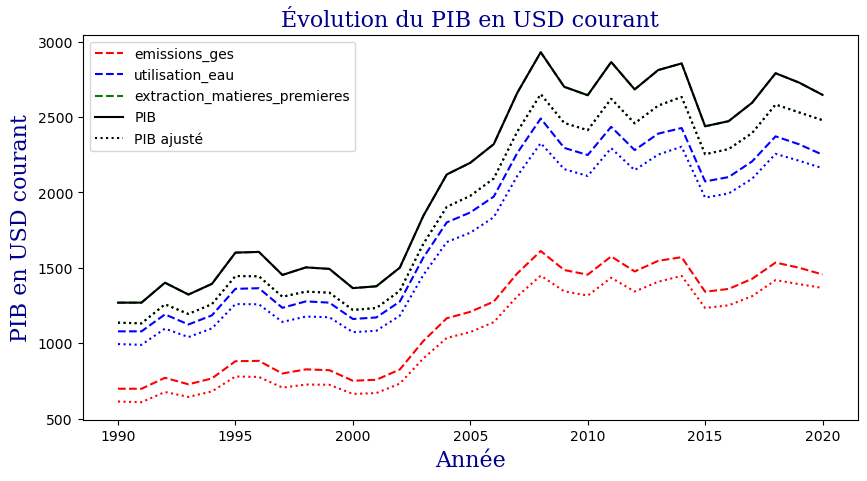

In [99]:
country_code = "FRA"
country = "France"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

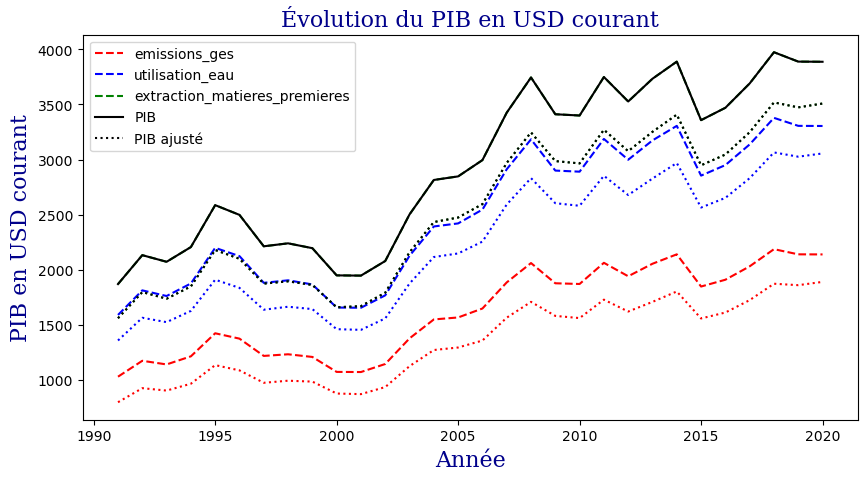

In [82]:
country_code = "DEU"
country = "Germany"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

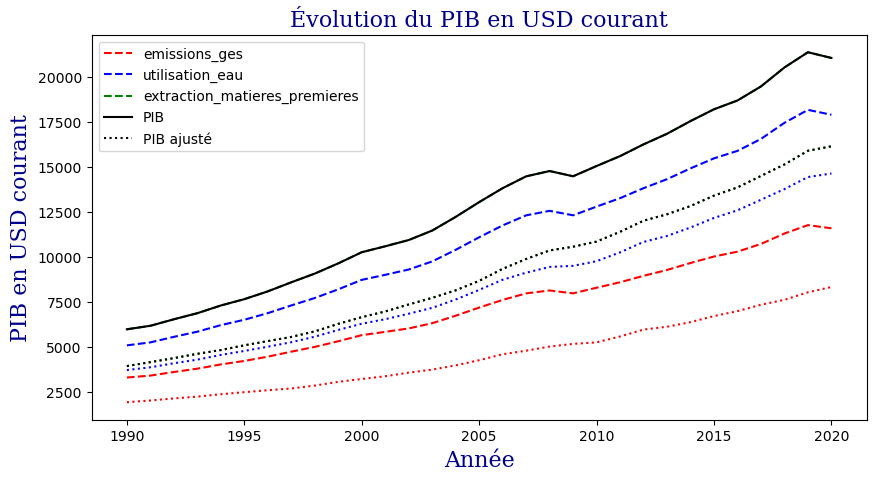

In [83]:
country_code = "USA"
country = "United States of America"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

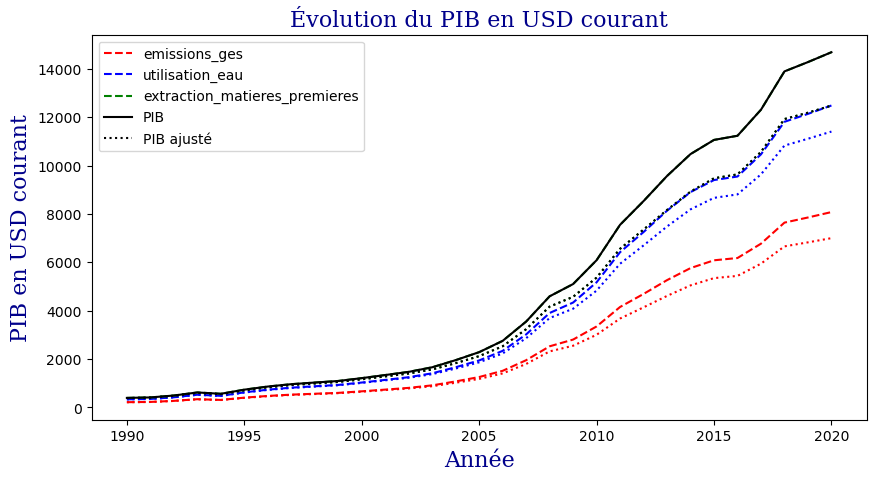

In [84]:
country_code = "CHN"
country = "China"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

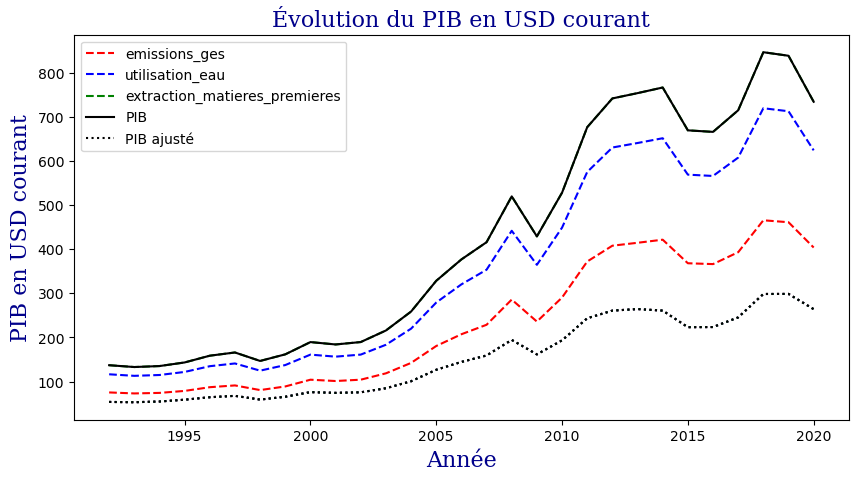

In [85]:
country_code = "SAU"
country = "United Arab Emirates"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

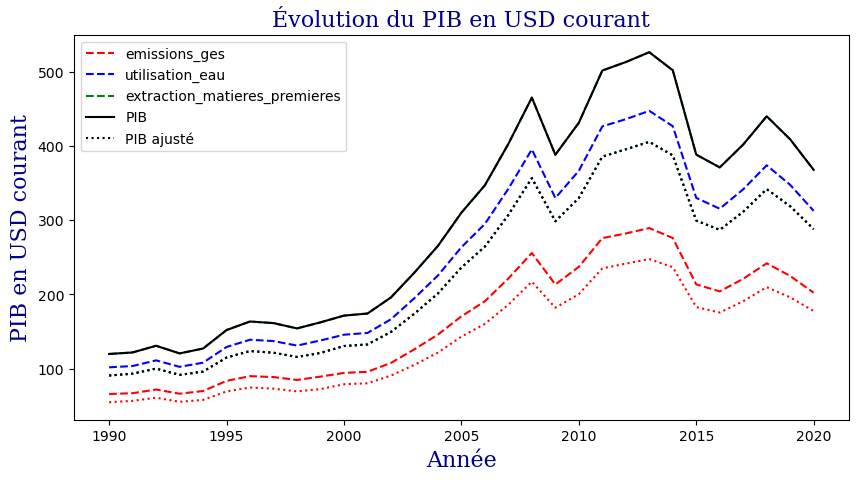

In [95]:
country_code = "NOR"
country = "Norway"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

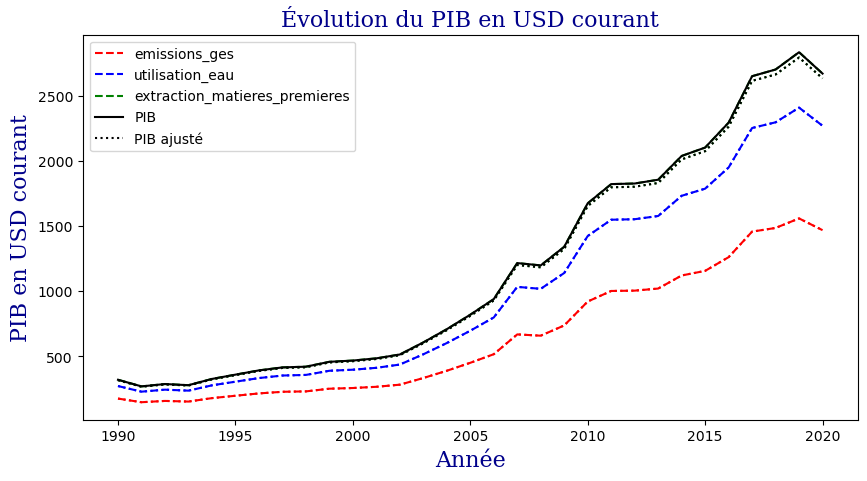

In [97]:
country_code = "IND"
country = "India"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

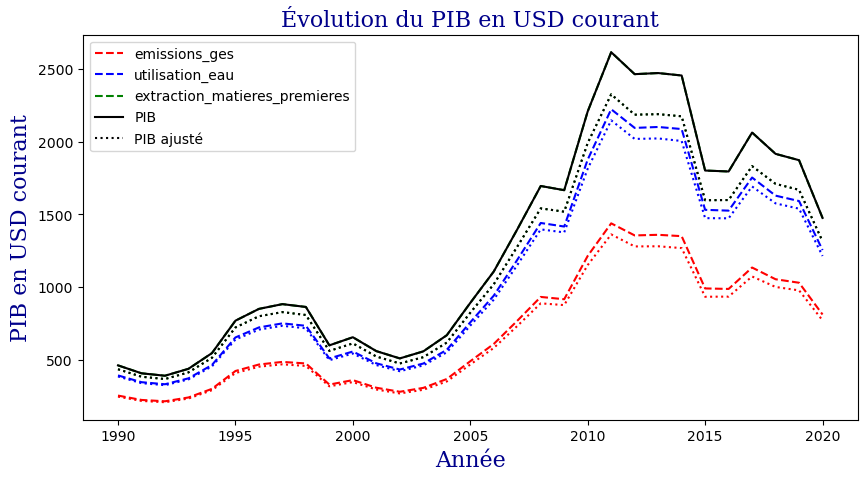

In [90]:
country_code = "BRA"
country = "Brazil"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

plot_pib_with_all_limits(
    pib_adjusted_main,
    dict_limits_config=dict_limits_config_main,
    from_year=first_year_no_missing,
    to_year=last_year_no_missing,
)

In [101]:
pib_adjusted_main

,PIB,sub_pib_emissions_ges,emissions_ges,sub_pib_utilisation_eau,utilisation_eau,sub_pib_extraction_matieres_premieres,extraction_matieres_premieres,PIB ajusté
Year,,,,,,,,
1960,62.225478,34.224013,NaN,18.667643,NaN,9.333822,NaN,0.000000
1961,67.461644,37.103904,NaN,20.238493,NaN,10.119247,NaN,0.000000
1962,75.607530,41.584141,NaN,22.682259,NaN,11.341129,NaN,0.000000
1963,84.759195,46.617557,NaN,25.427759,NaN,12.713879,NaN,0.000000
1964,94.007851,51.704318,NaN,28.202355,NaN,14.101178,NaN,0.000000
...,...,...,...,...,...,...,...,...
2018,2790.956879,1535.026283,1418.683165,837.287064,837.287064,418.643532,327.479118,2583.449347
2019,2728.870247,1500.878636,1391.954671,818.661074,818.661074,409.330537,320.631826,2531.247570
2020,2647.418692,1456.080280,1366.834181,794.225607,794.225607,397.112804,318.359378,2479.419166


# 5. Indicateurs de croissance associés


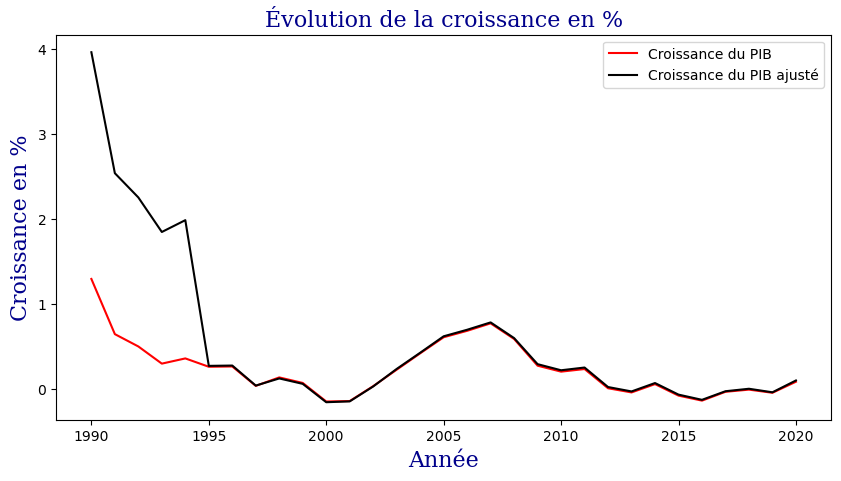

In [109]:
country_code = "FRA"
country = "France"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

pib_adjusted_main["growth_pib"] = pib_adjusted_main["PIB"].pct_change(periods=5)
pib_adjusted_main["growth_pib_adjusted"] = pib_adjusted_main["PIB ajusté"].pct_change(
    periods=5
)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

fig, axs = plt.subplots(figsize=(10, 5))

x = df_no_missing.index
y_1 = df_no_missing["growth_pib"]
y_2 = df_no_missing["growth_pib_adjusted"]
axs.plot(x, y_1, color="red", label="Croissance du PIB")
axs.plot(x, y_2, color="black", label="Croissance du PIB ajusté")

axs.set_title("Évolution de la croissance en %", fontdict=font)
axs.set_xlabel("Année", fontdict=font)
axs.set_ylabel("Croissance en %", fontdict=font)
axs.legend()

plt.show()

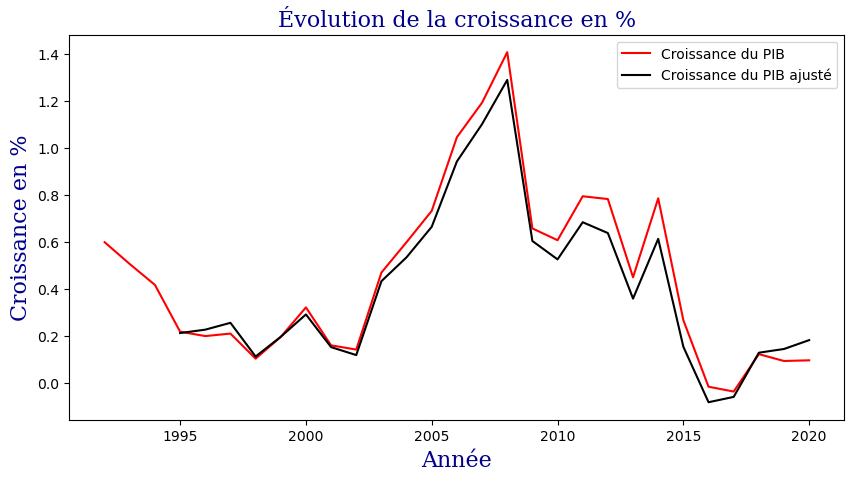

In [110]:
country_code = "SAU"
country = "United Arab Emirates"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

pib_adjusted_main["growth_pib"] = pib_adjusted_main["PIB"].pct_change(periods=5)
pib_adjusted_main["growth_pib_adjusted"] = pib_adjusted_main["PIB ajusté"].pct_change(
    periods=5
)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

fig, axs = plt.subplots(figsize=(10, 5))

x = df_no_missing.index
y_1 = df_no_missing["growth_pib"]
y_2 = df_no_missing["growth_pib_adjusted"]
axs.plot(x, y_1, color="red", label="Croissance du PIB")
axs.plot(x, y_2, color="black", label="Croissance du PIB ajusté")

axs.set_title("Évolution de la croissance en %", fontdict=font)
axs.set_xlabel("Année", fontdict=font)
axs.set_ylabel("Croissance en %", fontdict=font)
axs.legend()

plt.show()

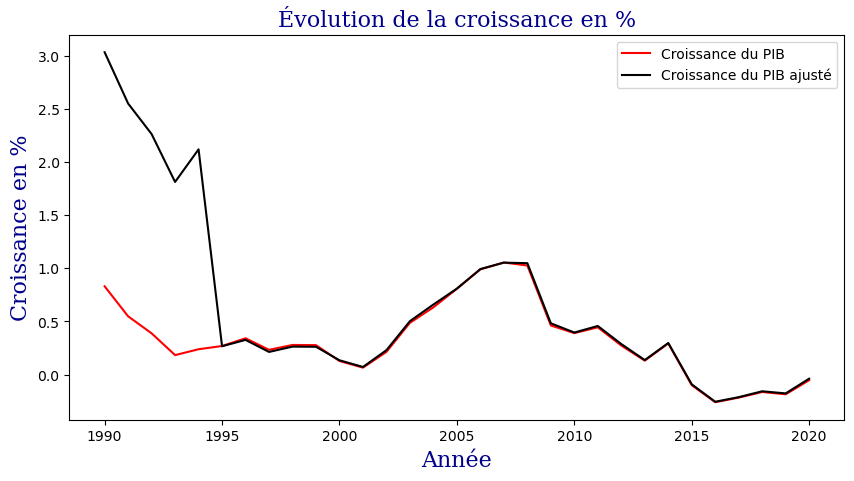

In [111]:
country_code = "NOR"
country = "Norway"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

pib_adjusted_main["growth_pib"] = pib_adjusted_main["PIB"].pct_change(periods=5)
pib_adjusted_main["growth_pib_adjusted"] = pib_adjusted_main["PIB ajusté"].pct_change(
    periods=5
)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

fig, axs = plt.subplots(figsize=(10, 5))

x = df_no_missing.index
y_1 = df_no_missing["growth_pib"]
y_2 = df_no_missing["growth_pib_adjusted"]
axs.plot(x, y_1, color="red", label="Croissance du PIB")
axs.plot(x, y_2, color="black", label="Croissance du PIB ajusté")

axs.set_title("Évolution de la croissance en %", fontdict=font)
axs.set_xlabel("Année", fontdict=font)
axs.set_ylabel("Croissance en %", fontdict=font)
axs.legend()

plt.show()

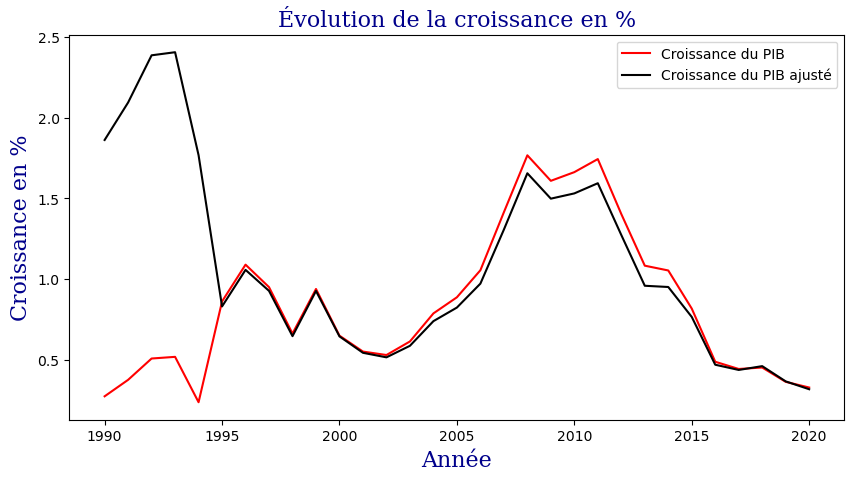

In [112]:
country_code = "CHN"
country = "China"

dict_limits_config_main = {
    "emissions_ges": {
        "coef": 0.55,
        "config": "ges_per_capita_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "utilisation_eau": {
        "coef": 0.3,
        "config": "eau_wb",
        "dict_associated_parameters": {"country_code": country_code},
    },
    "extraction_matieres_premieres": {
        "coef": 0.15,
        "config": "domestic_extraction_per_capita_rp",
        "dict_associated_parameters": {"country": country},
    },
}

pib = create_pib_data(country_code)
pib_adjusted_main = set_limits(pib, dict_limits_config_main)

pib_adjusted_main["growth_pib"] = pib_adjusted_main["PIB"].pct_change(periods=5)
pib_adjusted_main["growth_pib_adjusted"] = pib_adjusted_main["PIB ajusté"].pct_change(
    periods=5
)

df_no_missing = pib_adjusted_main.dropna()
first_year_no_missing = df_no_missing.index.min()
last_year_no_missing = df_no_missing.index.max()

fig, axs = plt.subplots(figsize=(10, 5))

x = df_no_missing.index
y_1 = df_no_missing["growth_pib"]
y_2 = df_no_missing["growth_pib_adjusted"]
axs.plot(x, y_1, color="red", label="Croissance du PIB")
axs.plot(x, y_2, color="black", label="Croissance du PIB ajusté")

axs.set_title("Évolution de la croissance en %", fontdict=font)
axs.set_xlabel("Année", fontdict=font)
axs.set_ylabel("Croissance en %", fontdict=font)
axs.legend()

plt.show()